<div style="border:solid green 3px; padding: 20px">

<b>Привет!</b>

Меня зовут Сороколетов Илья и я буду проверять твой проект. 

Предлагаю общаться на «**ты**», но если тебе будет комфортнее общаться на «**вы**», то сообщи об этом в комментариях)


Для твоего удобства, я буду выделять свои комментарии следующим образом:

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> Самые важные замечания. Они указывают на ключевые моменты, которые влияют на конечный результат проекта. </div>

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> Советы или замечания, которые помогут сделать твою работу лучше, но необязательны к выполнению.

</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> Так я выделяю все остальные комментарии.</div>


Пометками <b>v1-v2-v3-...</b> я буду отмечать версию проверки. Так ты сможешь быстро найти мои новые комментарии.

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте по моим рекомендациям — пиши об этом. Выбери для своих комментариев какой-то заметный цвет, так мне будет легче отследить изменения, например вот так:
    
<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
</div>

<b>Пожалуйста, не перемещай, не изменяй и не удаляй мои комментарии.</b> Если ты оставляешь свои комментарии, то делай это под моими, чтобы сообщения были расположены в хронологическом порядке. Всё это поможет выполнить повторную проверку твоего проекта быстрее. 

Перед отправкой работы я рекомендую нажимать Kernel -> Restart & Run All. Это перезапустит ядро и по очереди выполнит все ячейки. Так ты сможешь проверить, что всё работает корректно. Кнопка Kernel находится в панели сверху

Обязательно задавай вопросы если они возникнут, а я перехожу к проверке)

P.S. На всякий случай, я оставлю пустой шаблон для твоих комментариев ниже. Кликни два раза на мой комментарий, скопируй последние четыре строчки кода и вставляй их в пустую ячейку там, где ты хочешь оставить комментарий. Не забудь только перед этим сменить тип ячейки на Markdown. Быстро это можно сделать так: кликнуть на ячейку - нажать ESC - нажать M. 
    
    
<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Удали этот текст и вместо него напиши свой комментарий 🙂
</div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

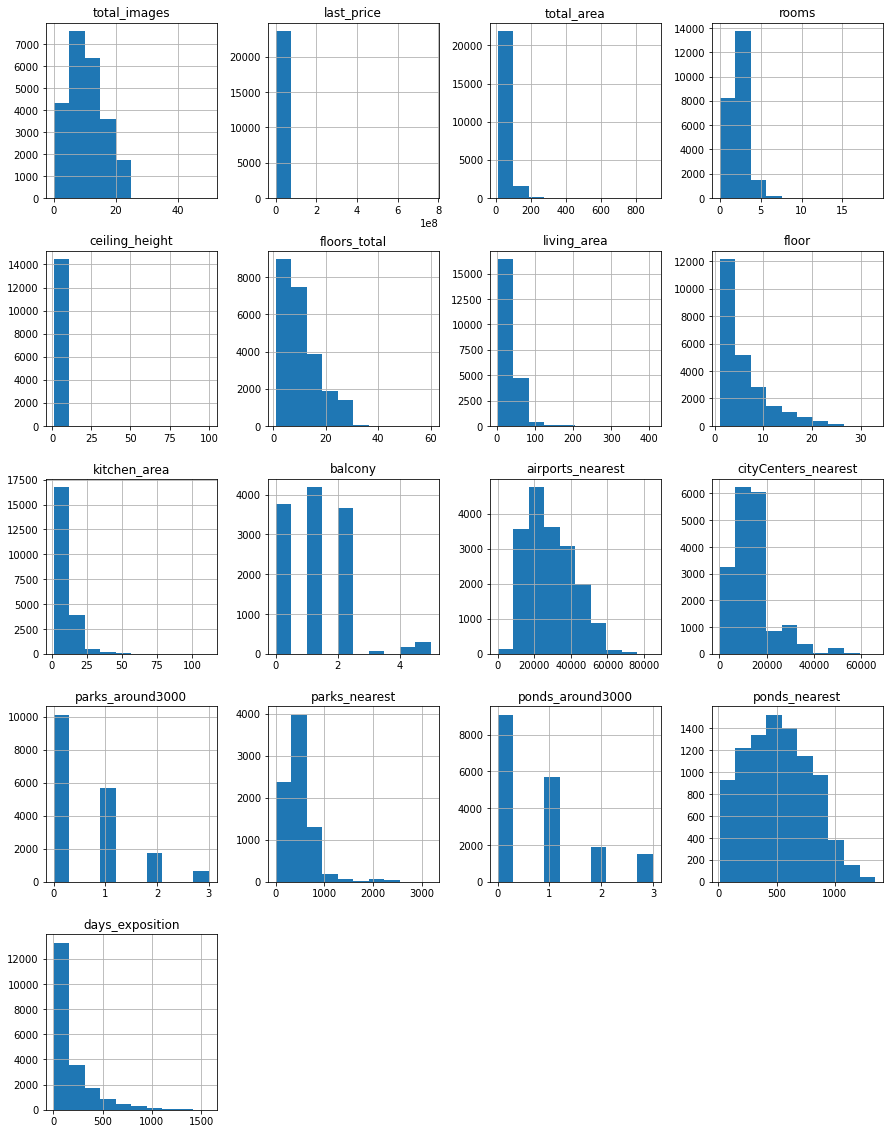

In [2]:
try:
    df = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
except:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep = '\t')

df.info(); df.hist(figsize=(15, 20))

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Все библиотеки лучше импортировать отдельно в первой ячейке. Это позволит тебе в любой момент добавить ещё одну библиотеку без перезаписи переменных.
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Графики построено верно! 
</div>
															
<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Если после кода вызывающего график добавить ";", то мы избавимся от строчки над графиком)

	data.hist(figsize=(15, 20));
</div>

In [3]:
pd.set_option('display.max_columns', None)
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Обрати внимание, что часть столбцов заменилась на "...". Чтобы это исправить, нужно увеличить максимальное количество отображающихся столбцов командой
			
	pd.set_option('display.max_columns', None)
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Если тебе так будет удобнее, то можно создать универсальную функцию, которая будет на вход принимать датафрейм, а на выходе будет выводить все необходимые характеристики поочередно применяя методы head, describe, info, duplicated и т.п.
</div>

### Предобработка данных

Из приведённой выше информации можно заметить огромное количество значений NaN, а также несколько сильно отличающихся значений в гистограммах. Для стобцов с "аномальными" значениями предлагаю выявить их и удалить из датафрейма. Остальные значения NaN предлагаю заменить медианными значениями. Пропуски в данных могуть быть из-за нежелания пользователя заполнять данные или из-за того что он сам не знает их (возможно некоторые пользователи не знают расстояние до ближайшего парка, водоёма или аэропорта, в таком случае лучше заменить пропуски на медианное значение). Также это могут быть значения 0 или False, как скорее всего есть в столбце 'balcony', т. е. пропуск - это отсутсвие балкона. Некоторые строки содержат подавляющее количество пропусков (как например строки 5 и 8), их лучше убрать из датафрейма, чтобы они не портили статистику.

#### Для начала скорректируем данные в столбце 'ceiling_height' 

В столбце 'ceiling_height' присутствуют "аномальные" значения (они вывелись на гистограмме), проверим их наличие. Будем считать, что "аномальное" значение - это значение больше 20 метров, так как при делении на 10 (т. е. в данных нет точки после целой части) высота потолка будет больше 2 метров, что нормально:

In [4]:
df.query('ceiling_height > 20')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
355,17,3600000.0,55.2,2018-07-12T00:00:00,2,25.0,5.0,32.0,2,False,False,False,NaN,2.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,259.0
3148,14,2900000.0,75.0,2018-11-12T00:00:00,3,32.0,3.0,53.0,2,NaN,False,False,8.0,NaN,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4643,0,4300000.0,45.0,2018-02-01T00:00:00,2,25.0,9.0,30.0,2,NaN,False,False,7.0,1.0,Санкт-Петербург,12016.0,13256.0,1.0,658.0,1.0,331.0,181.0
4876,7,3000000.0,25.0,2017-09-27T00:00:00,0,27.0,25.0,17.0,17,NaN,False,True,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,28.0
5076,0,3850000.0,30.5,2018-10-03T00:00:00,1,24.0,5.0,19.5,1,True,False,False,5.5,NaN,Санкт-Петербург,29686.0,8389.0,3.0,397.0,1.0,578.0,7.0
5246,0,2500000.0,54.0,2017-10-13T00:00:00,2,27.0,5.0,30.0,3,NaN,False,False,9.0,2.0,деревня Мины,NaN,NaN,NaN,NaN,NaN,NaN,540.0
5669,4,4400000.0,50.0,2017-08-08T00:00:00,2,26.0,9.0,21.3,3,NaN,False,False,7.0,2.0,Санкт-Петербург,28981.0,10912.0,1.0,305.0,0.0,NaN,267.0
5807,17,8150000.0,80.0,2019-01-09T00:00:00,2,27.0,36.0,41.0,13,NaN,False,False,12.0,5.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,38.0
6246,6,3300000.0,44.4,2019-03-25T00:00:00,2,25.0,5.0,31.3,5,NaN,False,False,5.7,NaN,Кронштадт,68923.0,50649.0,1.0,417.0,2.0,73.0,NaN
9379,5,3950000.0,42.0,2017-03-26T00:00:00,3,25.0,5.0,30.0,2,NaN,False,False,5.2,NaN,Санкт-Петербург,11647.0,13581.0,0.0,NaN,0.0,NaN,NaN


Приведём их к нормальным зачениям, т. е. разделим на 10 все значения, которые больше 20:

In [5]:
df['ceiling_height'] = df['ceiling_height'].apply(lambda x: x/10 if x > 20 else x)
# Проверим, что значения заменены:
len(df.query('ceiling_height > 20'))

0

Теперь заменим пропуски на медианное значение:

In [6]:
ceiling_height_without_NaN = df['ceiling_height'].dropna()
median_ceiling = ceiling_height_without_NaN.median()
df['ceiling_height'] = df['ceiling_height'].fillna(median_ceiling)
# Проверяем на наличие NaN
df['ceiling_height'].isna().sum()

0

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Согласен с таким решением, так как основная часть данных в этом столбце находится в небольшом диапазоне.
</div>

Выведем гистограмму по этому столбцу:

<AxesSubplot:>

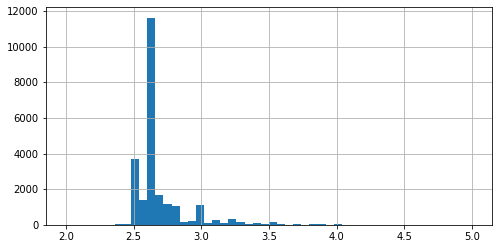

In [7]:
df['ceiling_height'].hist(bins=50,grid=True,figsize=(8,4), range=(2, 5))

Также "аномальные" значения возможно есть в столбце 'last_price' судя по гистограмме, выведем квартиры отфильтрованные по цене больше 100 миллионов рублей, что, очевидно, огромная сумма.

In [8]:
df.query('last_price > 100000000').head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
793,20,135000000.0,310.0,2018-05-22T00:00:00,4,3.30,5.0,250.0,2,NaN,False,False,50.0,NaN,Санкт-Петербург,34159.0,7251.0,2.0,295.0,3.0,190.0,342.0
1026,20,155000000.0,310.0,2018-10-12T00:00:00,5,5.30,3.0,190.0,3,NaN,False,False,63.0,2.0,Санкт-Петербург,24899.0,4785.0,0.0,NaN,1.0,603.0,NaN
1188,20,118000000.0,290.6,2018-06-01T00:00:00,6,3.82,6.0,188.7,3,NaN,False,False,22.0,1.0,Санкт-Петербург,25309.0,6224.0,1.0,217.0,0.0,NaN,316.0
1300,14,120000000.0,280.0,2018-07-12T00:00:00,5,4.70,4.0,162.0,3,NaN,False,False,30.0,NaN,Санкт-Петербург,24680.0,4247.0,1.0,464.0,3.0,339.0,225.0
1436,19,330000000.0,190.0,2018-04-04T00:00:00,3,3.50,7.0,95.0,5,NaN,False,False,40.0,NaN,Санкт-Петербург,23011.0,1197.0,3.0,519.0,3.0,285.0,233.0


Можем заметить, что у таких квартир довольно большая площадь и как правило больше цена у тех, что ближе к центру, так что это могут быть вполне адекватные значения.

#### Заменим название столбца 'cityCenters_nearest'

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>Пропуски в столбцах с картографическими данными лучше не трогать. Заполняя их таким образом, ты проставляешь одинаковые расстояния до центра (парка, прудов, аэропорта) для разных квартир, хотя они могут быть расположены в разных частях города. Эти пропуски заполнять не нужно
</div>

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>Если тут пропуск, то значит квартира не продана. Эти пропуски заполнять или удалять не нужно
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b>
<br>Обе правки выполнены 👍
</div>

Переименуем 'cityCenters_nearest' в 'city_centers_nearest':

In [9]:
df = df.rename(columns={'cityCenters_nearest': 'city_centers_nearest'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Пропуски в столбцах с картографическими данными лучше не трогать, так как мы не можем восстановить их с достаточной точностью. Лучше оставить их как есть.
</div>

Продолжим:

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>В  таком случае, нужно проверить чтобы жилая площадь и площадь кухни не была больше общей. Эти пропуски можно вообще не заполнять
</div>

Выведем первые 10 строк датафрейма для проверки:

In [10]:
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.65,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.65,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.65,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.65,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,2.65,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,2.65,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.65,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


#### Обработаем пропуски в столбцах 'balcony', 'parks_around3000' и 'ponds_around3000'

Заменим пропуски на 0, так как если пользователь не указывал кол-во балконов, парков и водоёмов - то их скорее всего нет:

In [11]:
df[['balcony', 'parks_around3000', 'ponds_around3000']] = df[['balcony', 'parks_around3000', 'ponds_around3000']].fillna(0)
df[['balcony', 'parks_around3000', 'ponds_around3000']].isna().sum()

balcony             0
parks_around3000    0
ponds_around3000    0
dtype: int64

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>👌
</div>

Снова выведем 10 первых строк, чтобы убедиться:

In [12]:
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.65,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.65,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.65,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.65,12.0,14.40,5,NaN,False,False,9.10,0.0,городской посёлок Янино-1,NaN,NaN,0.0,NaN,0.0,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,2.65,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,2.65,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.65,27.0,15.43,26,NaN,False,False,8.81,0.0,посёлок Мурино,NaN,NaN,0.0,NaN,0.0,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


#### Обработаем пропуски в столбце 'is_apartment'

Для начала выведем уникальные значения, чтобы понимать с чем связаны пропуски:

In [13]:
df['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

В основном столбец заполнен значениями NaN, так всего строк 23699. На втором месте значения False, на третьем соотвественно - True. Будем полагать что это значения False, потому что как правило квартир больше, чем апартаментов:

In [14]:
df['is_apartment'] = df['is_apartment'].fillna(False)

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>👌
</div>

Посмотрим есть ли ещё пропуски в таблице:

In [15]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
dtype: int64

Значения NaN в столбцах 'floors_total', 'living_area', 'kitchen_area', 'airports_nearest', 'city_centers_nearest', 'parks_nearest', 'days_exposition' и 'locality_name' невозможно адекватно заполнить, поэтому просто их заменим на 0 (все, кроме 'locality_name'), чтобы преобразовать некоторые столбцы к int, там где это уместно:

In [16]:
df[['floors_total', 'living_area', 'kitchen_area', 'airports_nearest', 'parks_nearest', 'days_exposition', 'ponds_nearest', 'city_centers_nearest']] = df[['floors_total', 'living_area', 'kitchen_area', 'airports_nearest', 'parks_nearest', 'days_exposition', 'ponds_nearest', 'city_centers_nearest']].fillna(0)
df.isna().sum()

total_images             0
last_price               0
total_area               0
first_day_exposition     0
rooms                    0
ceiling_height           0
floors_total             0
living_area              0
floor                    0
is_apartment             0
studio                   0
open_plan                0
kitchen_area             0
balcony                  0
locality_name           49
airports_nearest         0
city_centers_nearest     0
parks_around3000         0
parks_nearest            0
ponds_around3000         0
ponds_nearest            0
days_exposition          0
dtype: int64

#### Заменим тип данных в некоторых столбцах, где float можно заменить на integer

Заменим тип данных в столбцах где должны быть только целые значения (например общее кол-во этажей) или там где после дробной части идёт 0 (например: 'last_price', 'airports_nearest'):

In [17]:
df[['last_price', 'floors_total', 'airports_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'days_exposition', 'balcony']] = df[['last_price', 'floors_total', 'airports_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'days_exposition', 'balcony']].astype(int)
df.dtypes

total_images              int64
last_price                int64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total              int64
living_area             float64
floor                     int64
is_apartment               bool
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                   int64
locality_name            object
airports_nearest          int64
city_centers_nearest    float64
parks_around3000          int64
parks_nearest             int64
ponds_around3000          int64
ponds_nearest             int64
days_exposition           int64
dtype: object

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>Ещё здесь нужно изменить тип данных в столбце balcony
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b>
<br>Правка выполнена 👍
</div>

#### Устраним неявные дубликаты в 'locality_name'

Для начала посмотрим уникальные значения в этом столбце:

In [18]:
df['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

С помощью массива, цикла и функции str.replace() приведём столбец к нужному виду и снова выведем уникальные значения:

In [19]:
locality_name_wrong = ['городской посёлок', 'посёлок', 'поселок городского типа', 'коттеджный поселок', 'поселок при железнодорожной станции']
for name in locality_name_wrong:
    df['locality_name'] = df['locality_name'].str.replace(name, 'поселок')
df['locality_name'].unique()

array(['Санкт-Петербург', 'поселок Шушары', 'поселок Янино-1',
       'поселок Парголово', 'поселок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок Красный Бор', 'Гатчина', 'деревня Фёдоровское', 'Выборг',
       'Кронштадт', 'Кировск', 'деревня Новое Девяткино',
       'поселок Металлострой', 'поселок Лебяжье', 'поселок Сиверский',
       'поселок Молодцово', 'поселок Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок Ефимовский', 'поселок Плодовое', 'деревня Заклинье',
       'поселок Торковичи', 'поселок Первомайское', 'Красное Село',
       'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет', 'Сланцы',
       'село Путилово', 'Ивангород', 'Мурино', 'Шлиссельбург',
       'Никольское', 'Зелено

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Супер! Здесь всё верно)
</div>

#### Приведём дату к нормальному формату

In [20]:
df['first_day_exposition'] = pd.to_datetime(
    df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S'
)
df['first_day_exposition']

0       2019-03-07
1       2018-12-04
2       2015-08-20
3       2015-07-24
4       2018-06-19
           ...    
23694   2017-03-21
23695   2018-01-15
23696   2018-02-11
23697   2017-03-28
23698   2017-07-21
Name: first_day_exposition, Length: 23699, dtype: datetime64[ns]

#### Изучим "аномальные" значения в столбцах со стоимостью квартиры, количеством комнат и общей площадью

<AxesSubplot:>

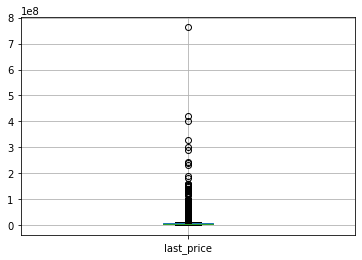

In [21]:
old_data = len(df)
df[['last_price']].boxplot()

Значения выше 2 * 10^8 сильно выбиваются из общей выборки, поэтому отфильтруем до этого значения и посмотрим сколько строк датафрейма у нас получилось:

In [22]:
df = df.query('last_price < 20000000')
len(df)

22976

In [23]:
df['rooms'].unique()

array([ 3,  1,  2,  4,  5,  6,  0, 11,  8,  7,  9, 10])

Здесь не вижу сильных отклонений.

<AxesSubplot:>

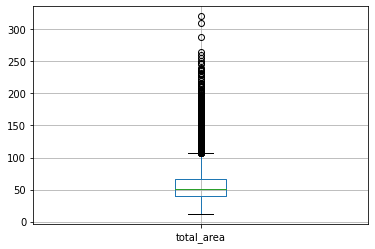

In [24]:
df[['total_area']].boxplot()

Здесь выделяются значения выше 250 м^2, отфильтруем датафрейм по этому параметру:

In [25]:
df = df.query('total_area < 250')
(len(df) / old_data) * 100

96.91970125321744

Столько процентов от исходного датафрейма у нас осталось, т. е. мы отбросили не больше 10%, что входит в норму.

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>Давай детальнее изучим аномалии в некоторых столбцах. Аномальное значение не значит, что оно нереальное или не может существовать. Это значит, что такое значение выделяется на общем фоне и встретить его большая редкость. Посмотри какие значения есть в столбцах со стоимостью квартиры, количеством комнат и общей площадью. Кажется, в них есть значения, которые сильно выделяются на общем фоне (слишком высокие). Не забудь проверить какое количество данных мы в итоге отбрасываем. Это количество не должно превышать 10% от изначального объёма данных. C этим может помочь следующий код

	new_data.shape[0] / old_data.shape[0]
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b>
<br>Отлично! Теперь всё верно)
</div>

### Посчитайте и добавьте в таблицу новые столбцы

#### Добавим столбец со значениями стоимости квадратного метра 'price_per_square_meter'

Для этого столбец со стоимостью жилья делим на общую площадь квартиры:

In [26]:
df['price_per_square_meter'] = df['last_price'] / df['total_area']
df['price_per_square_meter'] = df['price_per_square_meter'].astype(int)
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863,16028.0,1,482,2,755,0,120370
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,False,False,11.0,2,поселок Шушары,12817,18603.0,0,0,0,0,81,82920
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741,13933.0,1,90,2,574,558,92785
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856,8098.0,2,112,1,48,121,100000
5,10,2890000,30.4,2018-09-10,1,2.65,12,14.4,5,False,False,False,9.1,0,поселок Янино-1,0,0.0,0,0,0,0,55,95065


#### Добавим столбец с днём публикации объявления 'day_of_week'

In [27]:
df['day_of_week'] = df['first_day_exposition'].dt.weekday

#### Добавим столбец с месяцем публикации объявления 'month_publication'

In [28]:
df['month_publication'] = pd.DatetimeIndex(df['first_day_exposition']).month

#### Добавим столбец с годом публикации объявления 'year_publication'

In [29]:
df['year_publication'] = pd.DatetimeIndex(df['first_day_exposition']).year

#### Добавим столбец с типом этажа квартиры 'floor_type'

In [30]:
condlist = [df['floor'] == 1, df['floor'] == df['floors_total']]
choicelist = ['первый', 'последний']
df['floor_type'] = np.select(condlist, choicelist, 'другой')
df.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,day_of_week,month_publication,year_publication,floor_type
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,False,False,25.00,0,Санкт-Петербург,18863,16028.0,1,482,2,755,0,120370,3,3,2019,другой
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.60,1,False,False,False,11.00,2,поселок Шушары,12817,18603.0,0,0,0,0,81,82920,1,12,2018,первый
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.30,4,False,False,False,8.30,0,Санкт-Петербург,21741,13933.0,1,90,2,574,558,92785,3,8,2015,другой
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,False,False,41.00,0,Санкт-Петербург,31856,8098.0,2,112,1,48,121,100000,1,6,2018,другой
5,10,2890000,30.40,2018-09-10,1,2.65,12,14.40,5,False,False,False,9.10,0,поселок Янино-1,0,0.0,0,0,0,0,55,95065,0,9,2018,другой
6,6,3700000,37.30,2017-11-02,1,2.65,26,10.60,6,False,False,False,14.40,1,поселок Парголово,52996,19143.0,0,0,0,0,155,99195,3,11,2017,другой
7,5,7915000,71.60,2019-04-18,2,2.65,24,0.00,22,False,False,False,18.90,2,Санкт-Петербург,23982,11634.0,0,0,0,0,0,110544,3,4,2019,другой
8,20,2900000,33.16,2018-05-23,1,2.65,27,15.43,26,False,False,False,8.81,0,поселок Мурино,0,0.0,0,0,0,0,189,87454,2,5,2018,другой
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,False,False,False,6.50,2,Санкт-Петербург,50898,15008.0,0,0,0,0,289,88524,6,2,2017,другой
10,5,5050000,39.60,2017-11-16,1,2.67,12,20.30,3,False,False,False,8.50,0,Санкт-Петербург,38357,13878.0,1,310,2,553,137,127525,3,11,2017,другой


#### Добавим столбец с расстоянием до центра в км 'city_center_distance_km'

In [31]:
df['city_center_distance_km'] = df['city_centers_nearest'].apply(lambda x: x/1000 if x != 0 else -1).round() # Пропуски обозначаем за -1, чтобы они на вошли в значение 1 км
df['city_center_distance_km'] = df['city_center_distance_km'].astype(int)
df[['city_center_distance_km', 'city_centers_nearest']].head()

,city_center_distance_km,city_centers_nearest
0,16,16028.0
1,19,18603.0
2,14,13933.0
4,8,8098.0
5,-1,0.0


Но тут могут встретиться значения равные 0, проверим:

In [32]:
len(df.query('city_center_distance_km == 0'))

14

Эти значения заполним ближайшим значением, т. е. 1 км:

In [33]:
df['city_center_distance_km'] = df['city_center_distance_km'].replace(0, 1)
df['city_center_distance_km'] = df['city_center_distance_km'].replace(-1, 0)
len(df.query('city_center_distance_km == 0'))

5503

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Все необходимые колонки добавлены. Идём дальше)
</div>

### Проведите исследовательский анализ данных

#### Для начала изучим основные параметры

- Общая площадь:

<AxesSubplot:>

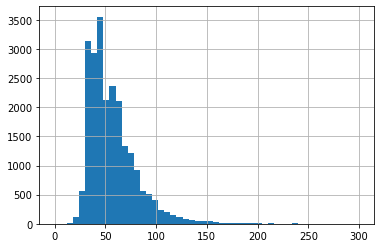

In [34]:
df['total_area'].hist(bins=50, range = (0, 300))

Из гистограммы видно, что большинство квартир имеют общую площадь в районе 45 м^2, есть значения около 300 м^2, но квартиры с такой площадью вполне могут существовать.

- Жилая площадь:

Тут и во многих гистрограммах 0 - это пропущенные значения, поэтому придётся отфильтровать:

<AxesSubplot:>

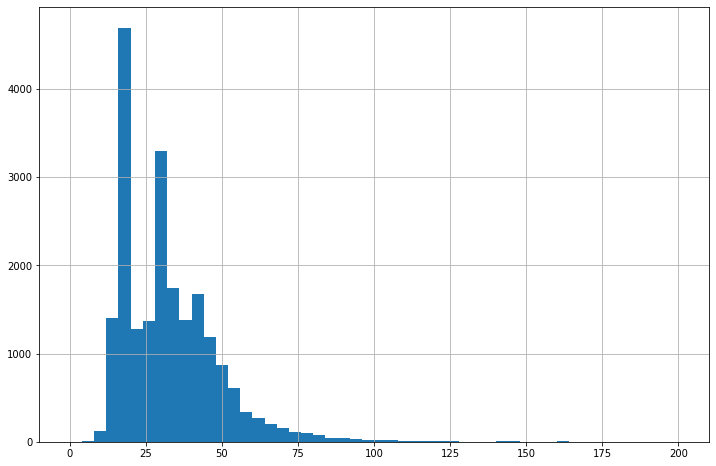

In [35]:
df1 = df.query('living_area != 0')
df1['living_area'].hist(range=(0, 200), bins=50, figsize=(12,8))

Гистограмма жилой площади имеет самый высокий пик в районе 20 м^2, второй пик в районе 30 м^2.

- Площадь кухни:

<AxesSubplot:>

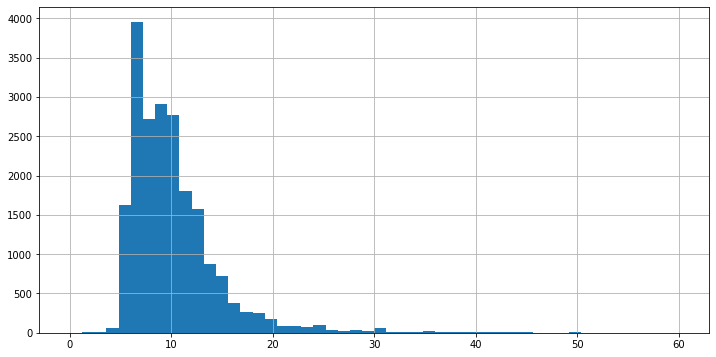

In [36]:
df1 = df.query('kitchen_area != 0')
df1['kitchen_area'].hist(range=(0, 60), bins=50, figsize=(12, 6))

Площадь кухни имеет пик в районе 7 м^2.

- Цена квартир:

<AxesSubplot:>

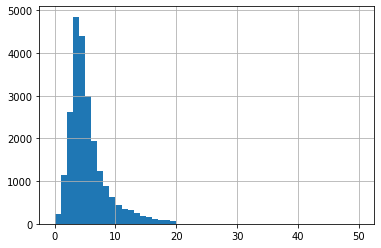

In [37]:
(df['last_price']/10**6).hist(range=(0,50), bins=50)

Пик в районе 3 миллионов рублей.

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Тут можно разделить все значения в столбце last_price на 1 млн, чтобы они пришли в более понятный вид)
</div>

- Количество комнат

<AxesSubplot:>

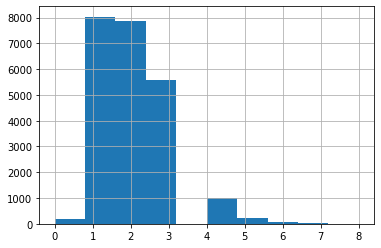

In [38]:
df['rooms'].hist(range=(0, 8))

Самое распространённое число комнат - 1 комната, но посмотрим на все уникальные значения столбца: 

In [39]:
df['rooms'].unique()

array([ 3,  1,  2,  4,  5,  6,  0, 11,  8,  7,  9, 10])

Самое большое количество комнат - 11.

- Высота потолков:

<AxesSubplot:>

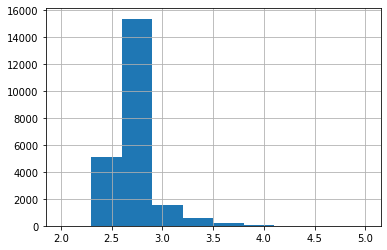

In [40]:
df['ceiling_height'].hist(range=(2, 5))

Пик в районе 2.7 м.

- Этаж квартиры:

<AxesSubplot:>

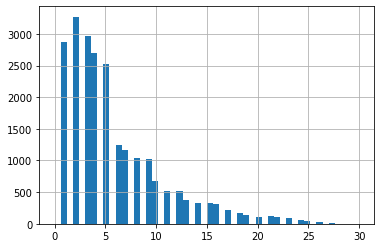

In [41]:
df['floor'].hist(bins=50, range=(0,30))

Пик - это число квартир на 2 этаже.

- Тип этажа квартиры:

<AxesSubplot:ylabel='floor_type'>

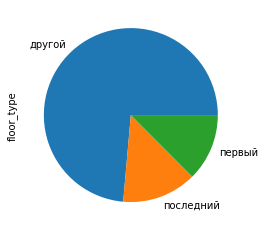

In [42]:
df['floor_type'].value_counts().plot(kind='pie')

Самое большое кол-во квартир находятся ни на первом, ни на последнем этаже, что довольно логично. На последнем этаже квартир чуть больше, чем на первом.

- Общее количество этажей в доме:

<AxesSubplot:>

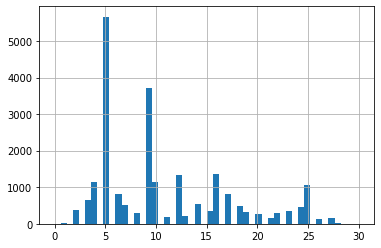

In [43]:
df1 = df.query('floors_total != 0')
df1['floors_total'].hist(range=(0, 30), bins=50)

Самое распространённое общее количество этажей в доме - 5.

- Расстояние до центра города в метрах:

<AxesSubplot:>

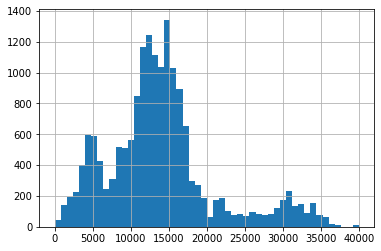

In [44]:
df1 = df.query('city_centers_nearest != 0')
df1['city_centers_nearest'].hist(range=(0, 40000), bins=50)

Самое высокое значение в районе 15000 метров или 15 км.

- Расстояние до ближайшего аэропорта:

<AxesSubplot:>

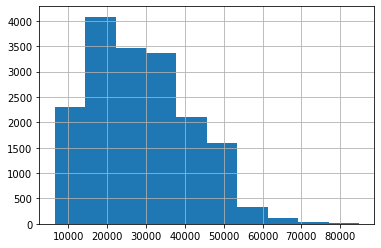

In [45]:
df1 = df.query('airports_nearest != 0')
df1['airports_nearest'].hist()

Самое высокое значение на данной гистограмме в районе 20000 метров или 20 км.

- Расстояние до ближайшего парка:

<AxesSubplot:>

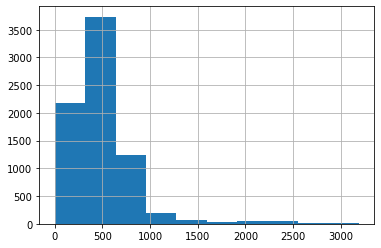

In [46]:
df1 = df.query('parks_nearest != 0')
df1['parks_nearest'].hist()

Самое высокое значение в районе 500 метров.

- День и месяц публикации объявления:

<AxesSubplot:>

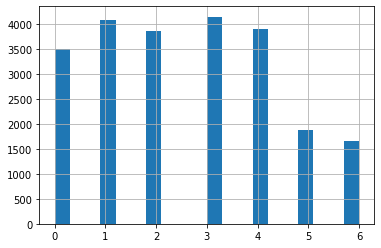

In [47]:
df['day_of_week'].hist(bins=20)

Больше всего объявлений размещено в четверг, меньше всего в воскресенье(числа 3 и 6 соответственно).

<AxesSubplot:>

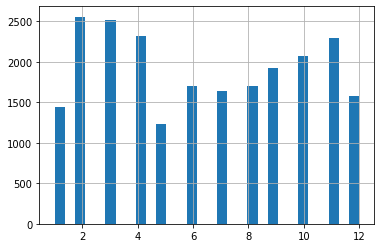

In [48]:
df['month_publication'].hist(bins=30)

Больше всего объявлений в феврале, меньше всего в мае.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Ты корректно подбираешь основные диапазоны, а также верно читаешь графики! 
</div>

#### Изучим, как быстро продавались квартиры

<AxesSubplot:>

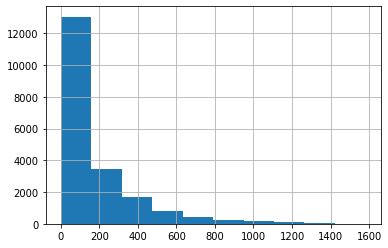

In [49]:
df1 = df.query('days_exposition != 0')
df1['days_exposition'].hist()

Выведем среднее и медианное значения времени продажи квартиры:

In [50]:
df1['days_exposition'].mean().astype(int)

177

In [51]:
df1['days_exposition'].median().astype(int)

94

Медианное значение практически в 2 раза ниже среднего. Более логичным было бы опираться именно на медианное значение, так как на среднее влияют небольшое количество очень долгих продаж. Я бы предложил разбиение по квартилям, самые последние 25% - долгие продажи, первые 25% - быстрые:

In [52]:
df1['days_exposition'].describe()

count    19992.000000
mean       177.807473
std        216.389689
min          1.000000
25%         44.000000
50%         94.000000
75%        227.000000
max       1580.000000
Name: days_exposition, dtype: float64

Отсюда можно сделать вывод, что быстрые продажи - это продажи до 44 дней, а долгие - более 227 дней.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Если интересно, то можно посмотреть на диапазон от 0 до 100 дней. Там есть пики, которым можно найти очень логичное объяснение</div>
</div>

#### Выясним какие факторы больше всего влияют на общую (полную) стоимость объекта

Построим диаграммы рассеяния для всех столбцов, кроме 'floor_type', так как в нём не числовые значения и кроме стобцов связанных с датой (так как зависимость в даннгом случае нелинейная):

array([[<AxesSubplot:xlabel='kitchen_area', ylabel='kitchen_area'>,
        <AxesSubplot:xlabel='last_price', ylabel='kitchen_area'>,
        <AxesSubplot:xlabel='living_area', ylabel='kitchen_area'>,
        <AxesSubplot:xlabel='rooms', ylabel='kitchen_area'>,
        <AxesSubplot:xlabel='total_area', ylabel='kitchen_area'>],
       [<AxesSubplot:xlabel='kitchen_area', ylabel='last_price'>,
        <AxesSubplot:xlabel='last_price', ylabel='last_price'>,
        <AxesSubplot:xlabel='living_area', ylabel='last_price'>,
        <AxesSubplot:xlabel='rooms', ylabel='last_price'>,
        <AxesSubplot:xlabel='total_area', ylabel='last_price'>],
       [<AxesSubplot:xlabel='kitchen_area', ylabel='living_area'>,
        <AxesSubplot:xlabel='last_price', ylabel='living_area'>,
        <AxesSubplot:xlabel='living_area', ylabel='living_area'>,
        <AxesSubplot:xlabel='rooms', ylabel='living_area'>,
        <AxesSubplot:xlabel='total_area', ylabel='living_area'>],
       [<AxesSubplot:xlabel=

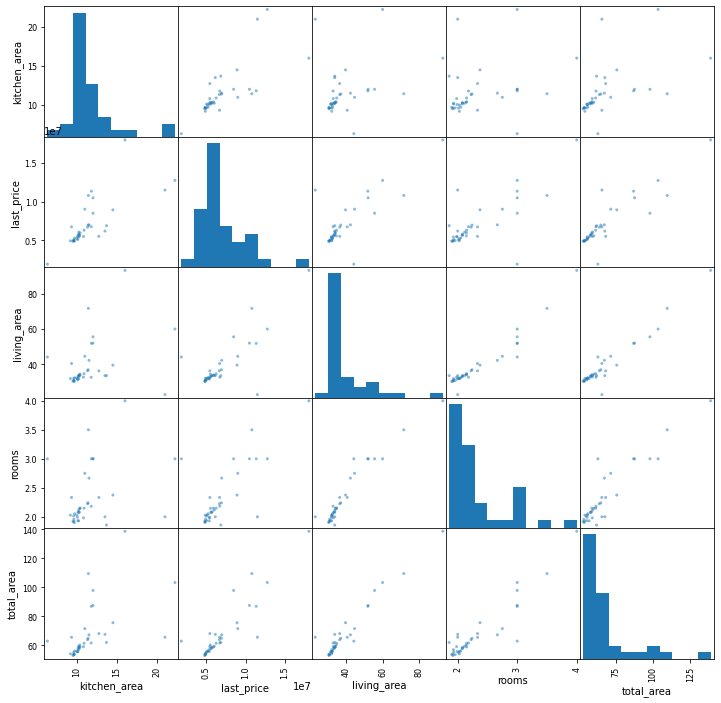

In [53]:
stat = df.query('living_area != 0 and kitchen_area != 0').pivot_table(index='total_images', values=['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms'])
pd.plotting.scatter_matrix(stat, figsize=(12, 12))

Если взять диаграммы с 'last_price' то можно заметить возврастающую диаграмму рассеяния у столбцов 'total_area', 'rooms', 'living_area', и 'kitchen_area', что довольно логично, так как цена квартиры будет увеличиваться с ростом общей площади, количества комнат, жилой площади и площади кухни. Но установить какой параметр влияет на цену квартиры наибольшим образом можно с помощью матрицы корреляции:

In [54]:
stat.corr()

,kitchen_area,last_price,living_area,rooms,total_area
kitchen_area,1.000000,0.736303,0.326181,0.295513,0.538498
last_price,0.736303,1.000000,0.783400,0.737425,0.886424
living_area,0.326181,0.783400,1.000000,0.954816,0.961279
rooms,0.295513,0.737425,0.954816,1.000000,0.920770
total_area,0.538498,0.886424,0.961279,0.920770,1.000000


<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>Рассчитывать корреляцию Пирсона для дня, месяца и года продажи не эффективно, так как цена в данном случае зависит от них не линейно. Чтобы изучить зависимость для этих параметров лучше построить bar plot или гистограмму рассчитав среднее значение или медиану
    
    https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b>
<br>Правка выполнена 👍
</div>

На общую цену квартиры больше всего влияет столбец 'total_area', т. е. общая площадь квартиры (наибольший коэффициент 0.887), что в принципе уже можно было заметить из диаграммы рассеяния. На втором месте - жилая площадь (коэффициент 0.798), на третьем - площадь кухни (коэффициент 0.763).

Построим bar plot для дня недели, месяца и года:

<AxesSubplot:xlabel='day_of_week'>

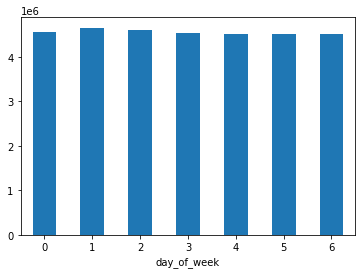

In [55]:
df.groupby('day_of_week')['last_price'].median().plot.bar(rot=0)

Все дни недели имеют практически одинаковое медианное значение, самое большое в феврале.

<AxesSubplot:xlabel='month_publication'>

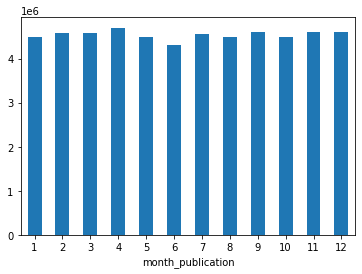

In [56]:
df.groupby('month_publication')['last_price'].median().plot.bar(rot=0)

Также как с днями недели, все месяцы имеют примерно одинаковое медианное значение, выделяется только июнь с самым низким показателем и апрель - с самым высоким.

<AxesSubplot:xlabel='year_publication'>

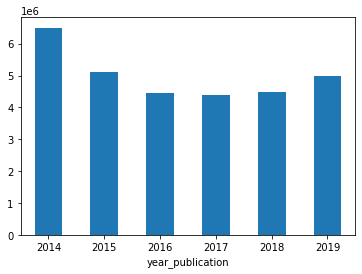

In [57]:
df.groupby('year_publication')['last_price'].median().plot.bar(rot=0)

У года размещения медианное значение цены квартиры уже заметно отличается, самое большое - в 2014, самое маленькое в 2017. Также можно заметить что с 2014 по 2017 медианное значение уменьшается, а дальше - увеличивается.

Проверим зависимость цены от типа этажа:  

In [58]:
floor_stat = df.pivot_table(index='floor_type', values='last_price', aggfunc='mean')
floor_stat

,last_price
floor_type,
другой,5.642135e+06
первый,4.375615e+06
последний,5.114146e+06


Самое большое среднее значение у "других" этажей, самое маленькое - у первых, что тоже довольно логично.

#### Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [59]:
top_10_local = df.pivot_table(index='locality_name', values='price_per_square_meter', aggfunc=['count', 'mean'])
top_10_local.columns = ['publications', 'mean_price_per_square_m']
top_10_local.sort_values(by='publications', ascending=False).head(10)

,publications,mean_price_per_square_m
locality_name,,
Санкт-Петербург,15011,108627.455466
поселок Мурино,556,85681.305755
поселок Шушары,440,78676.904545
Всеволожск,397,67213.785894
Пушкин,360,101788.130556
Колпино,337,75332.866469
поселок Парголово,327,90175.489297
Гатчина,307,68745.693811
деревня Кудрово,299,92473.086957


Из населённых пунктов с наибольшим числом объявлений самую большую среднюю цену за квадратный метр имеет Санкт-Петербург, на втором месте - Пушкин, на последнем - Выборг.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Всё верно! Как вариант, тут можно построить барплот для топ10 по средней цене, так будет более наглядно)
</div>

#### Вычислим зависимость между ценой квартиры и расстоянием до центра города в Санкт-Петербурге

Отфильтруем, применим сводную таблицу - по умолчанию применяется функция mean(), потом построим график:

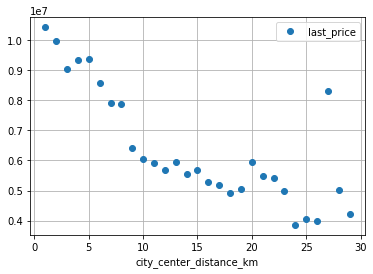

In [60]:
sankt = df.query('locality_name == "Санкт-Петербург" and city_center_distance_km != 0')
sankt_price = sankt.pivot_table(index='city_center_distance_km', values='last_price')
sankt_price.plot(use_index=True, y='last_price', grid=True, style='o')
plt.show()

Общая тенденция - чем ближе к центру, тем дороже. Но есть и отклонения - квартиры расположенные в 4 и 5 км от центра города в среднем дороже, чем те, которые расположены в 3 км, также выбиваются значения 20-22, 27-29, очень сильно выбивается значение 27 км, на этом расстоянии квартиры стоят больше, чем 7 км от центра. Вероятно на таком отдалении находятся какие-то элитные районы с большей ценой квартиры.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b>
<br>Отличный анализ 👍
</div>

### Общий вывод

В данной работе были обработаны данные - заменены пропуски на медианные значения или удалены из датафрейма из-за невозможности заменить. Вычислены "аномальные" значения высоты потолков и изменены. Приведены столбцы к типа 'float' к значениям 'int', изменён тип даты на 'datetime64'. Были добавлены новые столбцы: цена одного квадратного метра, день публикации объявления (0 - понедельник, 1 - вторник и т.д.), месяц и год публикации объявления, тип этажа квартиры (значения — «первый», «последний», «другой»), расстояние в км до центра города. Данные параметры были изучены в пункте 4.1. Были сделаны следующие выводы:

1. Быстрые продажи - это продажи до 44 дней, а долгие - более 227 дней.

2. На общую цену квартиры больше всего влияет столбец 'total_area', т. е. общая площадь квартиры (наибольший коэффициент 0.887), что в принципе уже можно было заметить из диаграммы рассеяния. На втором месте - жилая площадь (коэффициент 0.798), на третьем - площадь кухни (коэффициент 0.763). День и месяц размещения практически никак не влияют на общую цену, а год размещения имеет нелинейную тенденцию - "У года размещения медианное значение цены квартиры уже заметно отличается, самое большое - в 2014, самое маленькое в 2017. Также можно заметить что с 2014 по 2017 медианное значение уменьшается, а дальше - увеличивается".

3. Из населённых пунктов с наибольшим числом объявлений самую большую среднюю цену за квадратный метр имеет Санкт-Петербург, на втором месте - Пушкин, на последнем - Выборг.

4. Зависимость между ценой квартиры и расстоянием - чем ближе к центру, тем дороже. Но есть и отклонения - квартиры расположенные в 4 и 5 км от центра города в среднем дороже, чем те, которые расположены в 3 км, также выбиваются значения 20-22, 27-29, очень сильно выбивается значение 27 км, на этом расстоянии квартиры стоят больше, чем 7 км от центра. Вероятно на таком отдалении находятся какие-то элитные районы с большей ценой квартиры.

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>После всех внесённых правок, обязательно перепроверь общий вывод и промежуточные выводы и поправь их по необходимости
</div>

<div class="alert alert-danger">
<b>❌ Итоговый комментарий ревьюера v1:</b> 
<br>Необходимо поправить:
<br>- не заполнять пропуски в столбцах с картографическими данными	
<br>- не заполнять пропуски в столбце days_exposition
<br>- изменить тип данных в столбце balcony
<br>- отбросить аномальные значения 
<br>- корректно изучить зависимость цены от времени публикации объявления
<br>- поправить выводы там, где это необходимо
</div>

<div class="alert alert-success">
<b>✔️ Итоговый комментарий ревьюера v2:</b>
<br>Все правки выполнены. Молодец!
<br>Проделана огромная работа! У тебя подробные, понятные и логичные выводы, которые ты подкрепляешь фактами. Были использованы разные графики и способы, чтобы как можно более тщательно изучить данные и у тебя это получилось! 
<br>Я рад был поработать над проверкой твоей работы) В качестве дополнительного материала для изучения могу порекомендовать следующий ресурс:

	https://www.python-graph-gallery.com/
<br>В нем содержится большая библиотека графиков с готовым кодом, который можно использовать при работе.
<br>Поздравляю со сдачей проекта и желаю удачи в дальнейшем обучении! 😉    
</div>

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод